# Level A
# Pick a dataset and objective

### Dataset:
- Dataset of Nifty Stock prices of Indian companies. ( https://www.kaggle.com/rohanrao/nifty50-stock-market-data  )

### Problem Statement:

- Creating a Predictive Model using any Algorithm (Deep Learning/Machine Learning) that can predict the stock price(Close column) of ASIANPAINTs.

- A prediction for the year of 2016 using data from 2009-2015.

- Show accuracy of the algorithms and explaining a choice of accuracy metric (RMSE/MAE/MAPE,R^2, Adjusted R^2).



### This algorithm predits the Close column of the data set for 2016 year using 2009 - 20015 years data.

In [1]:
### Loading the libraries required

import pandas as pd       #Loading pandas for creating and adjusting dataframes 
import numpy as np        # Loading Numpy for creating and adjusting arrays

import seaborn as sns                # Loading seaborn for visualizations
import matplotlib.pyplot as plt      # Loading matplotlib for visualizations
%matplotlib inline

from sklearn.preprocessing import StandardScaler    # Loading standard scaler to normalize the data

from sklearn.model_selection import GridSearchCV   # Loading gridsearch CV for hyperparameter tuning using Crss Validation
from sklearn.neighbors import KNeighborsRegressor  #Loading KNN regressor to cretae a model
from sklearn.ensemble import RandomForestRegressor #Loading Random Forest regressor to cretae a model
from sklearn.ensemble import AdaBoostRegressor     #Loading Ada Boost regressor to cretae a model

from tensorflow.keras.models import Sequential     #Loading Sequential model from tensor flow to craete a ANN model
from tensorflow.keras.layers import Dense          #Loading Dense layer from tensor flow to craete a Neural network layers
from tensorflow.keras.layers import Dropout        #Loading Drop out Layer

from tensorflow.keras.optimizers import Adam       #Loading Adam optimizer for NN

from sklearn.metrics import mean_squared_error     #Loading Mean Squared Error to to check the error metrics of each model 
from sklearn.metrics import mean_absolute_percentage_error  #Loading Mean absolute percentage error to to check the error metrics of each model 
from sklearn.metrics import r2_score       #Loading R^2 (R squared) to check the efficiency metrics of each model


In [2]:
df = pd.read_csv("ASIANPAINT.csv")   #Loading the data set using read_csv to dataframe

In [3]:
# Adjusting the "Date" column to date time format and creating a Year column to split the data
df["Year"] = pd.to_datetime(df.Date, format="%d-%m-%Y").dt.year

In [16]:
df_2016 = df[(df["Year"] <= 2016) & (df["Year"]>=2009)]  #Spliiting the dat to use only fronm 2009 to 2016

In [18]:
#Checking the NON null Count of and Data type of the columns
df_2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1982 entries, 2253 to 4234
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                1982 non-null   object 
 1   Symbol              1982 non-null   object 
 2   Series              1982 non-null   object 
 3   Prev Close          1982 non-null   float64
 4   Open                1982 non-null   float64
 5   High                1982 non-null   float64
 6   Low                 1982 non-null   float64
 7   Last                1982 non-null   float64
 8   Close               1982 non-null   float64
 9   VWAP                1982 non-null   float64
 10  Volume              1982 non-null   int64  
 11  Turnover            1982 non-null   float64
 12  Trades              1385 non-null   float64
 13  Deliverable Volume  1982 non-null   float64
 14  %Deliverble         1982 non-null   float64
 15  Year                1982 non-null   int64  
dtypes: 

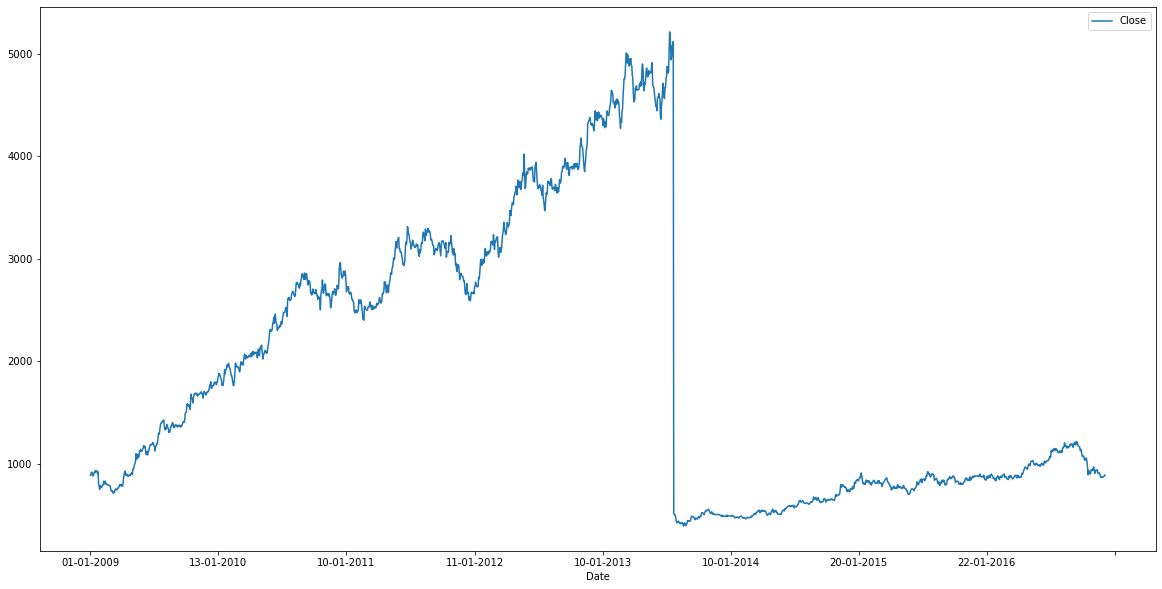

In [23]:
# Plotting the "Close" column of the data set
fig = df_2016.plot(x = "Date",y = "Close",figsize=(20,10))
fig.figure.savefig("Close_plot.jpg",bbox_inches='tight')
plt.show()

In [24]:
#Dropping the unnecessary columns of the data   
df_2016 = df_2016.drop(["Date","Symbol","Series"],axis=1)

In [26]:
#Splitting the dataset into train and test 
# Train Data for 2009 -2015 years
# Test Data for 2016
train = df_2016.loc[df_2016["Year"] < 2016]
test = df_2016.loc[df_2016["Year"] == 2016]

In [27]:
# Checking null values count in all the coulmns of the train dataset
train.isnull().sum()

Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                597
Deliverable Volume      0
%Deliverble             0
Year                    0
dtype: int64

In [28]:
# Checking the skewness of the "Trades"
train["Trades"].skew(axis = 0, skipna = True)

1.8170049925548912

In [29]:
# Imputing the Columns with mean if not skewed
# Imputing the column with median if skewed
train["Trades"].fillna(train["Trades"].median(),inplace = True)
train.isnull().sum()

C:\Users\cricl\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
Year                  0
dtype: int64

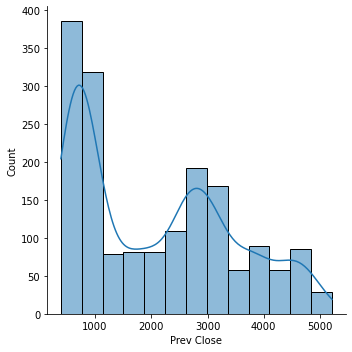

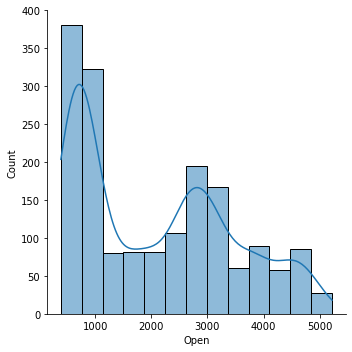

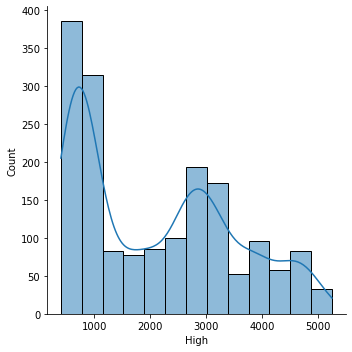

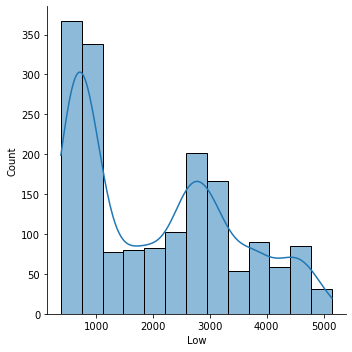

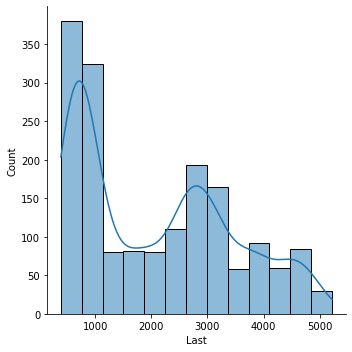

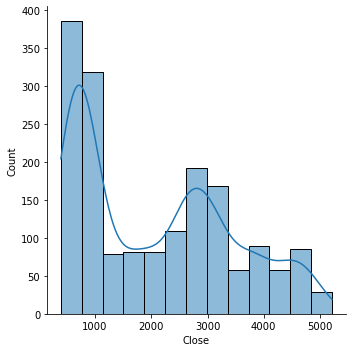

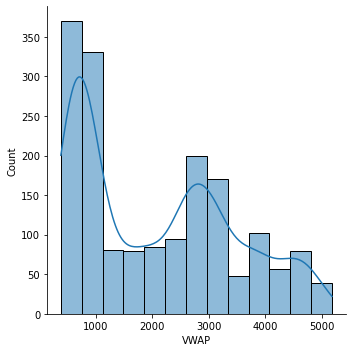

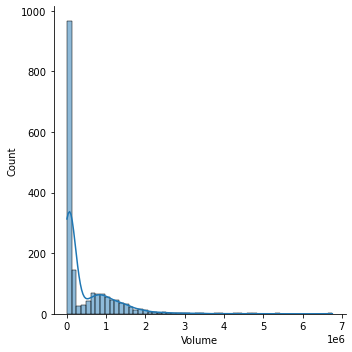

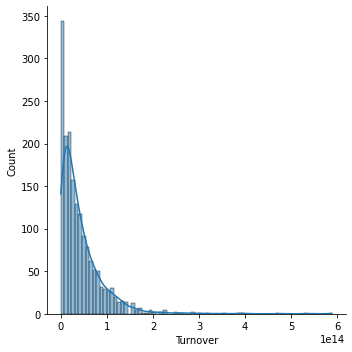

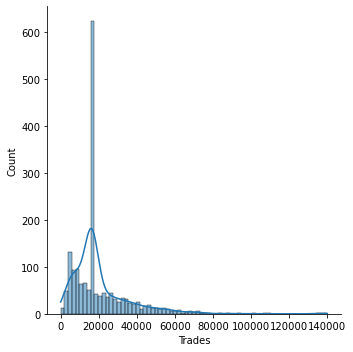

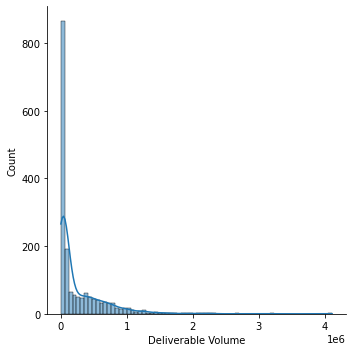

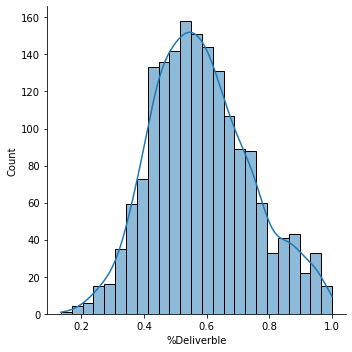

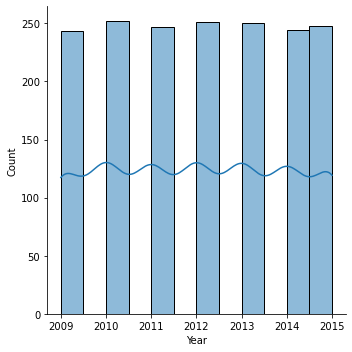

In [30]:
#Visualizxing the distributaion of the data for all the independent Columns
for i in range(len(train.columns)):
    x = train.columns[i]
    fig = sns.displot(data=train, x=x, kde=True)
    filename = "{} Histogram.jpg".format(train.columns[i])
    fig.figure.savefig(filename,bbox_inches='tight')

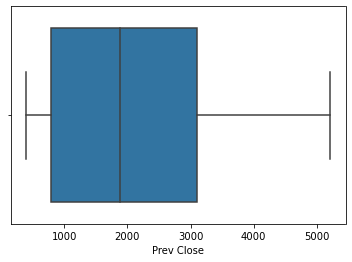

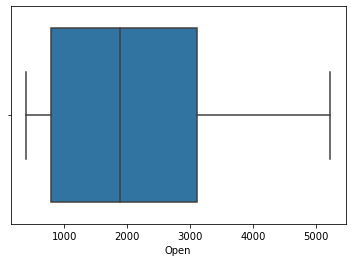

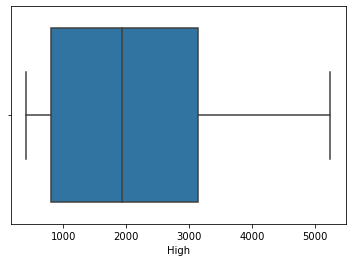

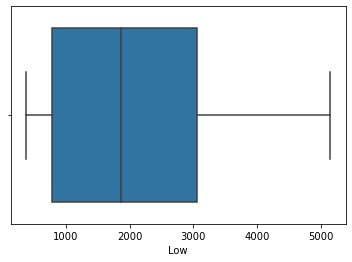

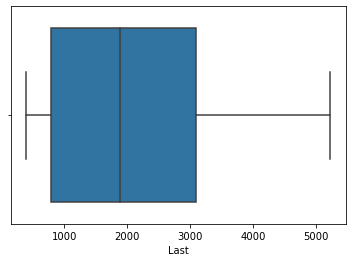

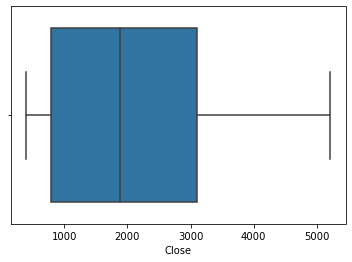

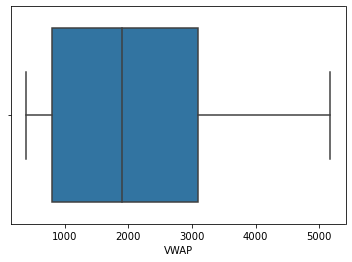

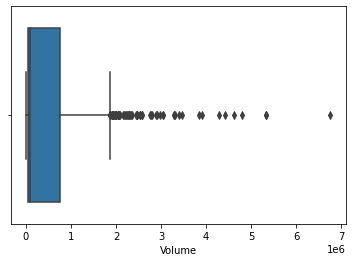

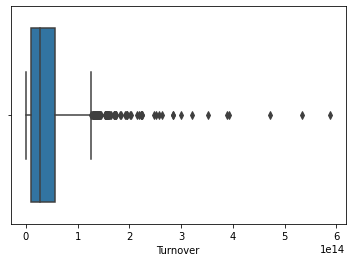

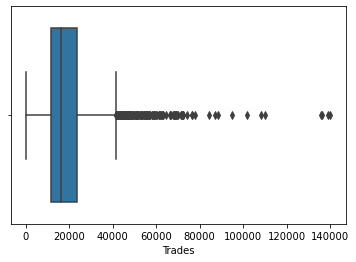

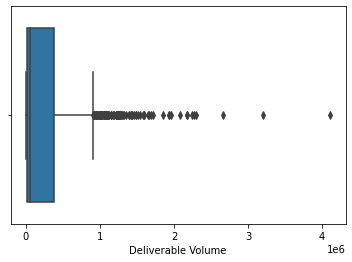

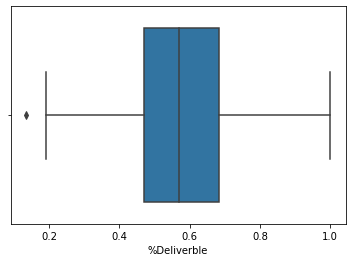

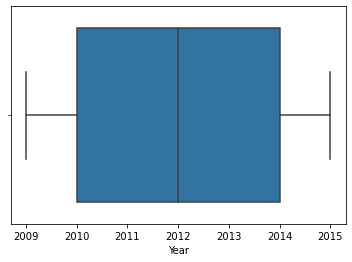

In [31]:
# Visualizing th data set for OUTliers using BOXPLOT
for i in range(train.shape[1]):
    x = train.columns[i]
    fig = sns.boxplot(data=train, x=x)
    filename = "{} Boxplot.jpg".format(train.columns[i])
    fig.figure.savefig(filename,bbox_inches='tight')
    plt.show()

In [32]:
#SCAling the Train and Test Datasets Using STANDARD SCALER
scaler = StandardScaler()
scaled_array_train = scaler.fit_transform(train)
train = pd.DataFrame(scaled_array_train, columns = train.columns)
scaled_array_test = scaler.fit_transform(test)
test = pd.DataFrame(scaled_array_test, columns = test.columns)

In [33]:
# Creating a FUNCTION to remove outliers
def remove_outliers(df):    
    for i in range(df.shape[1]):
        col_name = df.columns[i]
        upper_limit = df[col_name].mean() +3*df[col_name].std()
        lower_limit = df[col_name].mean() -3*df[col_name].std()
        df = df[(df[col_name]<upper_limit) & (df[col_name]>lower_limit)]
    return(df)

In [34]:
#Remove outliers
train = remove_outliers(train)

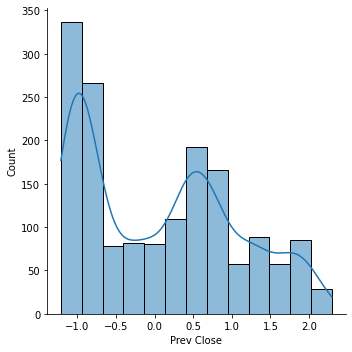

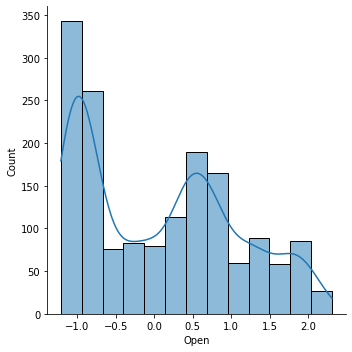

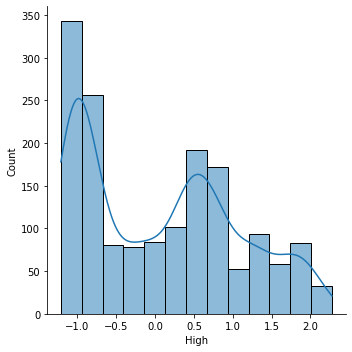

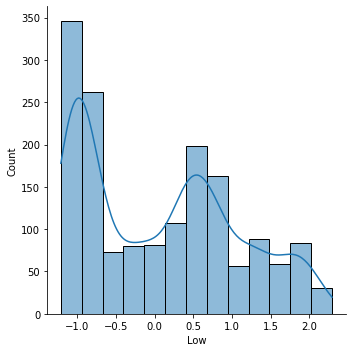

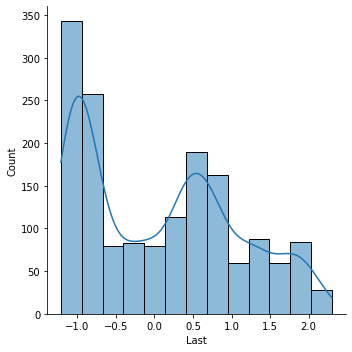

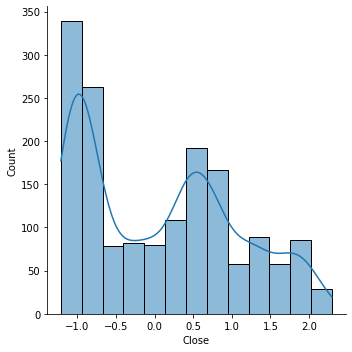

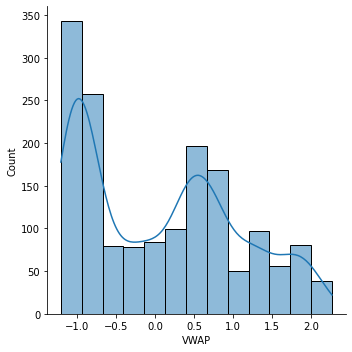

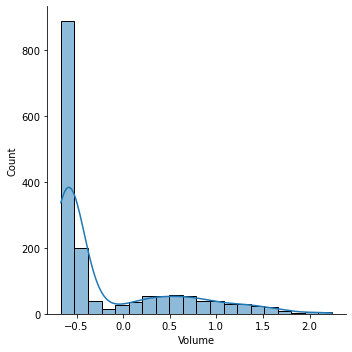

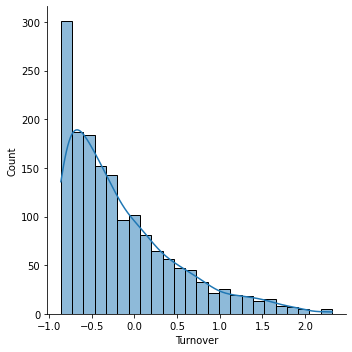

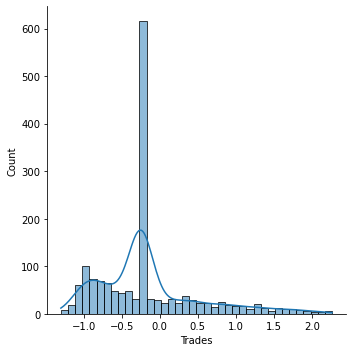

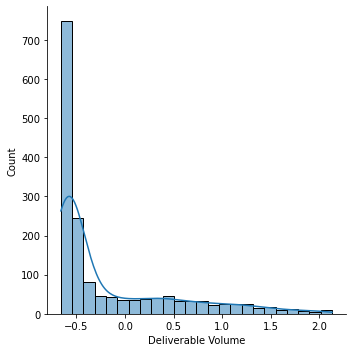

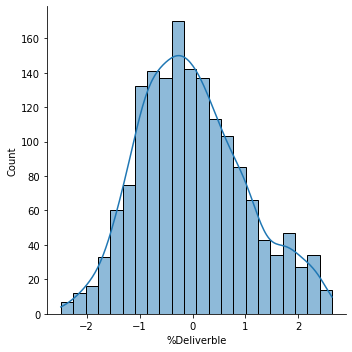

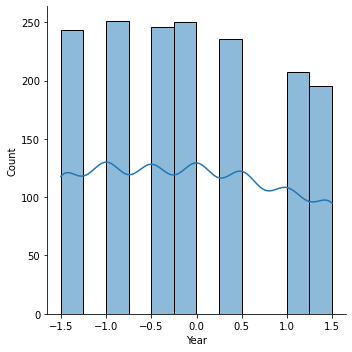

In [35]:
# Visualizing the cleaned Data
for i in range(train.shape[1]):
    x = train.columns[i]
    fig = sns.displot(data=train, x=x, kde=True)
    filename = "{} Cleaned_Histogram.jpg".format(train.columns[i])
    fig.figure.savefig(filename,bbox_inches='tight')

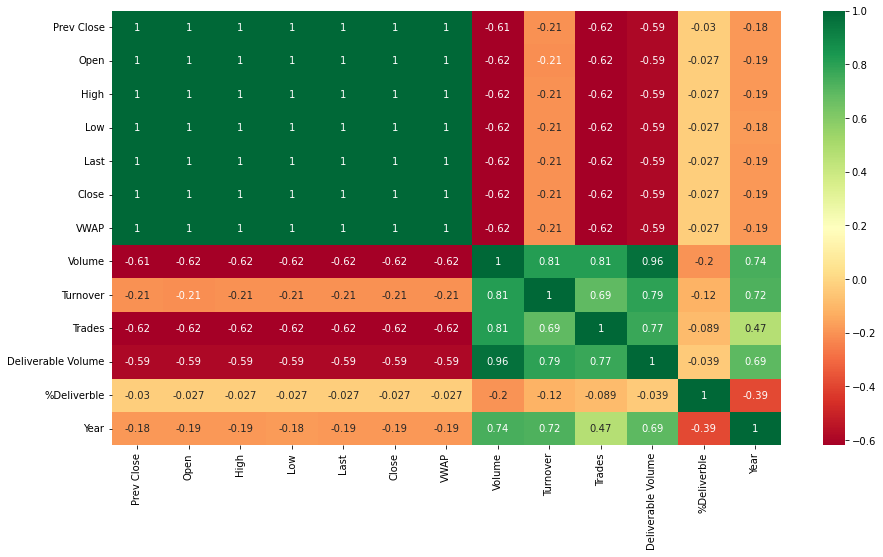

In [36]:
# Visualizing the Data for Corelations Using HEAT MAP
corr= train.corr()
plt.figure(figsize=(15,8))
fig = sns.heatmap(corr,annot=True,cmap='RdYlGn')
fig.figure.savefig("Heat map.jpg",bbox_inches='tight')
plt.show()

In [37]:
#Dropping the Columns with Corelation of 1 as they donot comtribute to the model creation
train = train.drop(["Prev Close", "Open", "High","Low","Last","Year"],axis = 1)
test = test.drop(["Prev Close", "Open", "High","Low","Last","Year"],axis = 1)

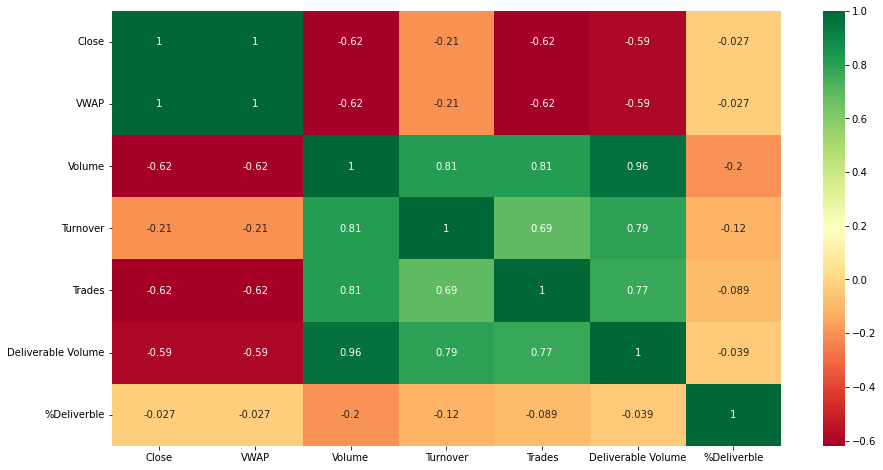

In [38]:
corr= train.corr()
plt.figure(figsize=(15,8))
fig = sns.heatmap(corr,annot=True,cmap='RdYlGn')
fig.figure.savefig("Feature_selected_Heat map.jpg",bbox_inches='tight')
plt.show()

In [39]:
#Splitting X_train, Y_train, X_test, Y_test
X_train = train.drop(["Close"],axis=1)
Y_train = train["Close"]

X_test = test.drop(["Close"],axis=1)
Y_test = test["Close"]

<AxesSubplot:>

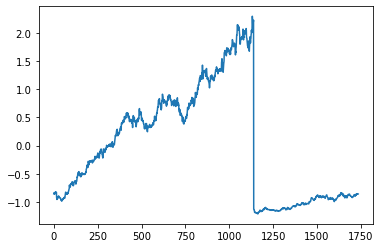

In [40]:
Y_train.plot()

<AxesSubplot:>

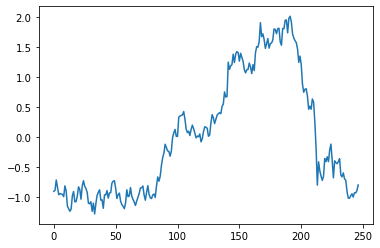

In [41]:
Y_test.plot()

In [42]:
#List Hyperparameters that we want to tune.
n_neighbors = list(range(1,15))
p=[1,2]
#Convert to dictionary
params = dict(n_neighbors=n_neighbors, p=p)
#Create new KNN object
KNN = KNeighborsRegressor()
#Use GridSearch
GSCV = GridSearchCV(KNN, params, cv=10)
#Fit the model
best_model = GSCV.fit(X_train,Y_train)
#Print The value of best Hyperparameters
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best p: 2
Best n_neighbors: 2


In [43]:
# Assigning the parameters tuned
p = best_model.best_estimator_.get_params()['p']
n_neighbors = best_model.best_estimator_.get_params()['n_neighbors']

In [44]:
#KNN Model creation and fitting the data
model_KNN = KNeighborsRegressor(n_neighbors=n_neighbors,p = p)
model_KNN.fit(X_train,Y_train)

KNeighborsRegressor(n_neighbors=2)

In [45]:
#Random Forest Model creation and fitting the data
model_RF = RandomForestRegressor()
model_RF.fit(X_train, Y_train)

RandomForestRegressor()

In [46]:
#Ada Boost Model creation and fitting the data
model_Ada = AdaBoostRegressor()
model_Ada.fit(X_train, Y_train)

AdaBoostRegressor()

In [47]:
#Creating the structure of the Neural Network model
# Assigning the num of neurons per layer
hidden_layer1 = 150
hidden_layer2 = 200
hidden_layer3 = 250
# Learnig rate and Input dimensions
learning_rate = 0.01
input_dim = X_train.shape[1]
# Creating a Sequential Nueral network model with 3 Dense and 3 Dropuout layers altenatively
model_NN = Sequential()

model_NN.add(Dense(hidden_layer1, input_dim=input_dim, kernel_initializer='normal', activation='relu'))

model_NN.add(Dropout(0.2))
                 
model_NN.add(Dense(hidden_layer2, kernel_initializer='normal', activation='relu'))
             
model_NN.add(Dropout(0.2))
             
model_NN.add(Dense(hidden_layer3, kernel_initializer='normal', activation='relu'))
             
model_NN.add(Dropout(0.2))
             
model_NN.add(Dense(1, kernel_initializer='normal', activation='linear'))

#Compilimng the model using Optimizer and learning rate
model_NN.compile(loss='mse',optimizer=Adam(learning_rate=learning_rate),metrics=['mse'])
# train the model
history = model_NN.fit(X_train,Y_train,epochs=300,batch_size=10)


Epoch 1/300
163/163 [==============================] - 1s 4ms/step - loss: 0.0875 - mse: 0.0876
Epoch 2/300
163/163 [==============================] - 1s 3ms/step - loss: 0.0565 - mse: 0.0566
Epoch 3/300
163/163 [==============================] - 1s 3ms/step - loss: 0.0555 - mse: 0.0554
Epoch 4/300
163/163 [==============================] - 1s 3ms/step - loss: 0.0502 - mse: 0.0503
Epoch 5/300
163/163 [==============================] - 1s 3ms/step - loss: 0.0371 - mse: 0.0371
Epoch 6/300
163/163 [==============================] - 1s 3ms/step - loss: 0.0330 - mse: 0.0330
Epoch 7/300
163/163 [==============================] - 1s 3ms/step - loss: 0.0405 - mse: 0.0405
Epoch 8/300
163/163 [==============================] - 1s 3ms/step - loss: 0.0403 - mse: 0.0404
Epoch 9/300
163/163 [==============================] - 1s 4ms/step - loss: 0.0384 - mse: 0.0383
Epoch 10/300
163/163 [==============================] - 1s 3ms/step - loss: 0.0332 - mse: 0.0332
Epoch 11/300
163/163 [=================

163/163 [==============================] - 0s 1ms/step - loss: 0.0485 - mse: 0.0485
Epoch 168/300
163/163 [==============================] - 0s 1ms/step - loss: 0.0441 - mse: 0.0442
Epoch 169/300
163/163 [==============================] - 0s 1ms/step - loss: 0.0437 - mse: 0.0437
Epoch 170/300
163/163 [==============================] - 0s 1ms/step - loss: 0.0421 - mse: 0.0421
Epoch 171/300
163/163 [==============================] - 0s 1ms/step - loss: 0.0378 - mse: 0.0378
Epoch 172/300
163/163 [==============================] - 0s 1ms/step - loss: 0.0435 - mse: 0.0434
Epoch 173/300
163/163 [==============================] - 0s 1ms/step - loss: 0.0417 - mse: 0.0416
Epoch 174/300
163/163 [==============================] - 0s 1ms/step - loss: 0.0462 - mse: 0.0461
Epoch 175/300
163/163 [==============================] - 0s 1ms/step - loss: 0.0473 - mse: 0.0473
Epoch 176/300
163/163 [==============================] - 0s 1ms/step - loss: 0.0445 - mse: 0.0445
Epoch 177/300
163/163 [===========

# Metrics
- MSE -- Mean Squared Error
- RMSE -- Root mean squred error
- R2 -- R Squared
- ADJ_R2 -- Adjusted R Squared
- MAPE -- Mean Absolute Percentage Error

In [48]:
# Created a function to evaluate the metrics of all the models

def Evaluate_models(model):
    y_pred = model.predict(X_test)
    
    MSE = mean_squared_error(Y_test, y_pred)
    
    RMSE = mean_squared_error(Y_test, y_pred, squared=False)

    R2 = r2_score(Y_test, y_pred)
    
    ADJ_R2 = 1 - (1-R2)*(len(Y_train)-1)/(X_train.shape[0]-X_train.shape[1]-1)

    MAPE = mean_absolute_percentage_error(Y_test, y_pred)
    
    return (MSE,RMSE,R2,ADJ_R2,MAPE)

In [49]:
# Evaluating all the metrics for K Nearest Neighbour model
Metrics_KNN  = Evaluate_models(model_KNN)
MSE_KNN = Metrics_KNN[0]
RMSE_KNN = Metrics_KNN[1]
R2_KNN = Metrics_KNN[2]
ADJ_R2_KNN = Metrics_KNN[3]
MAPE_KNN = Metrics_KNN[4]

In [50]:
# Evaluating all the metrics for Random Forest model
Metrics_RF  = Evaluate_models(model_RF)
MSE_RF= Metrics_RF[0]
RMSE_RF = Metrics_RF[1]
R2_RF = Metrics_RF[2]
ADJ_R2_RF = Metrics_RF[3]
MAPE_RF = Metrics_RF[4]


In [51]:
# Evaluating all the metrics for Ada Boost model
Metrics_Ada  = Evaluate_models(model_Ada)
MSE_Ada= Metrics_Ada[0]
RMSE_Ada = Metrics_Ada[1]
R2_Ada = Metrics_Ada[2]
ADJ_R2_Ada = Metrics_Ada[3]
MAPE_Ada = Metrics_Ada[4]

In [52]:
# Evaluating all the metrics for Neural Network model
Metrics_NN  = Evaluate_models(model_NN)
MSE_NN= Metrics_NN[0]
RMSE_NN = Metrics_NN[1]
R2_NN = Metrics_NN[2]
ADJ_R2_NN = Metrics_NN[3]
MAPE_NN = Metrics_NN[4]

# Creating the Dataframe with Metrics corresponding to all the models created

In [53]:
Comp={'Models':['KNN','Random Forest','AdaBoost',"Neural Network"],
      'MSE' :[MSE_KNN,MSE_RF,MSE_Ada,MSE_NN],
      'RMSE' :[RMSE_KNN,RMSE_RF,RMSE_Ada,RMSE_NN],
      'R2' :[R2_KNN,R2_RF,R2_Ada,R2_NN],
      'ADJ R2' :[ADJ_R2_KNN,ADJ_R2_RF,ADJ_R2_Ada,ADJ_R2_NN],
      'MAPE' :[MAPE_KNN,MAPE_RF,MAPE_Ada,MAPE_NN]
      
   }

Compare=pd.DataFrame(Comp)
Compare

,Models,MSE,RMSE,R2,ADJ R2,MAPE
0,KNN,0.138955,0.372766,0.861045,0.860531,1.319430
1,Random Forest,0.002505,0.050049,0.997495,0.997486,0.143844
2,AdaBoost,0.007262,0.085217,0.992738,0.992711,0.361345
3,Neural Network,0.191309,0.437389,0.808691,0.807983,1.496710


# Plotting Model MSE

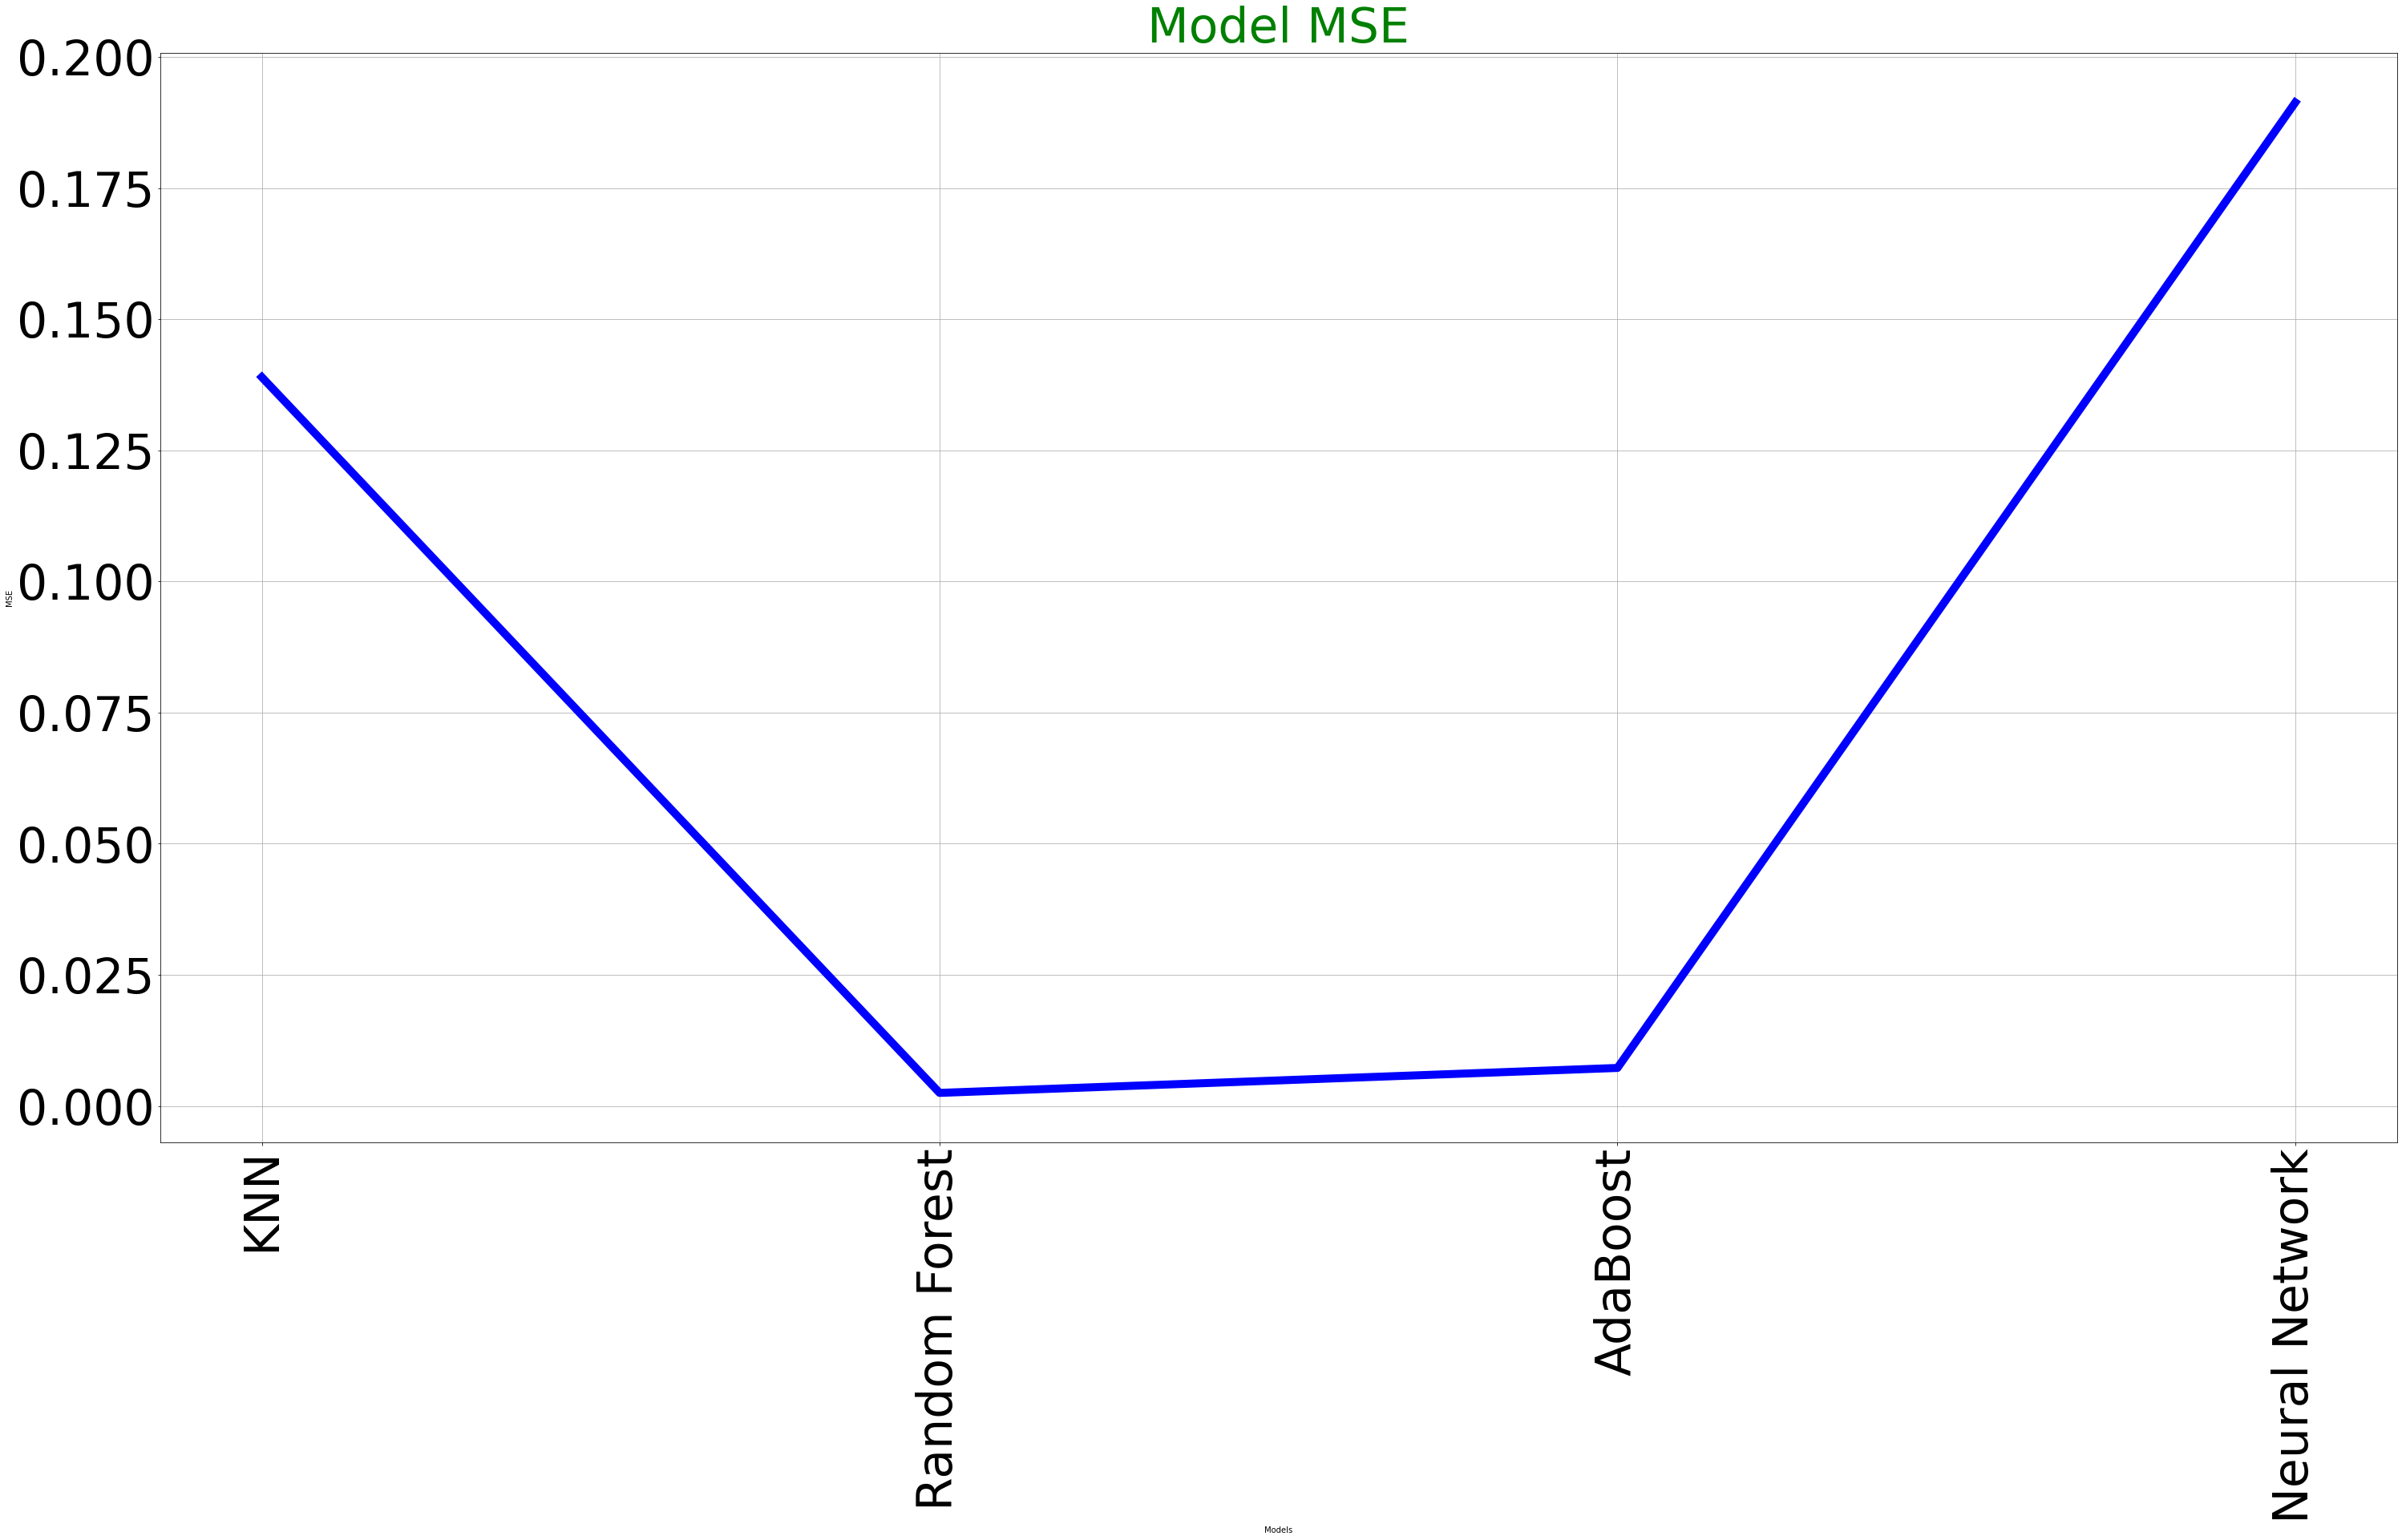

In [54]:
plt.figure(figsize =(50, 25))
plt.plot(Compare['Models'],Compare['MSE'],c='blue', lw=10)

plt.title('Model MSE',fontdict={'fontsize': 60,'fontweight' : 60,'color' : 'g'})
plt.xlabel('Models')
plt.ylabel('MSE')

plt.yticks(fontsize=60)
plt.xticks(rotation=90, fontsize=60)
plt.grid()
plt.savefig("MSE.jpg",bbox_inches='tight')
plt.show()

# Plotting Model RMSE

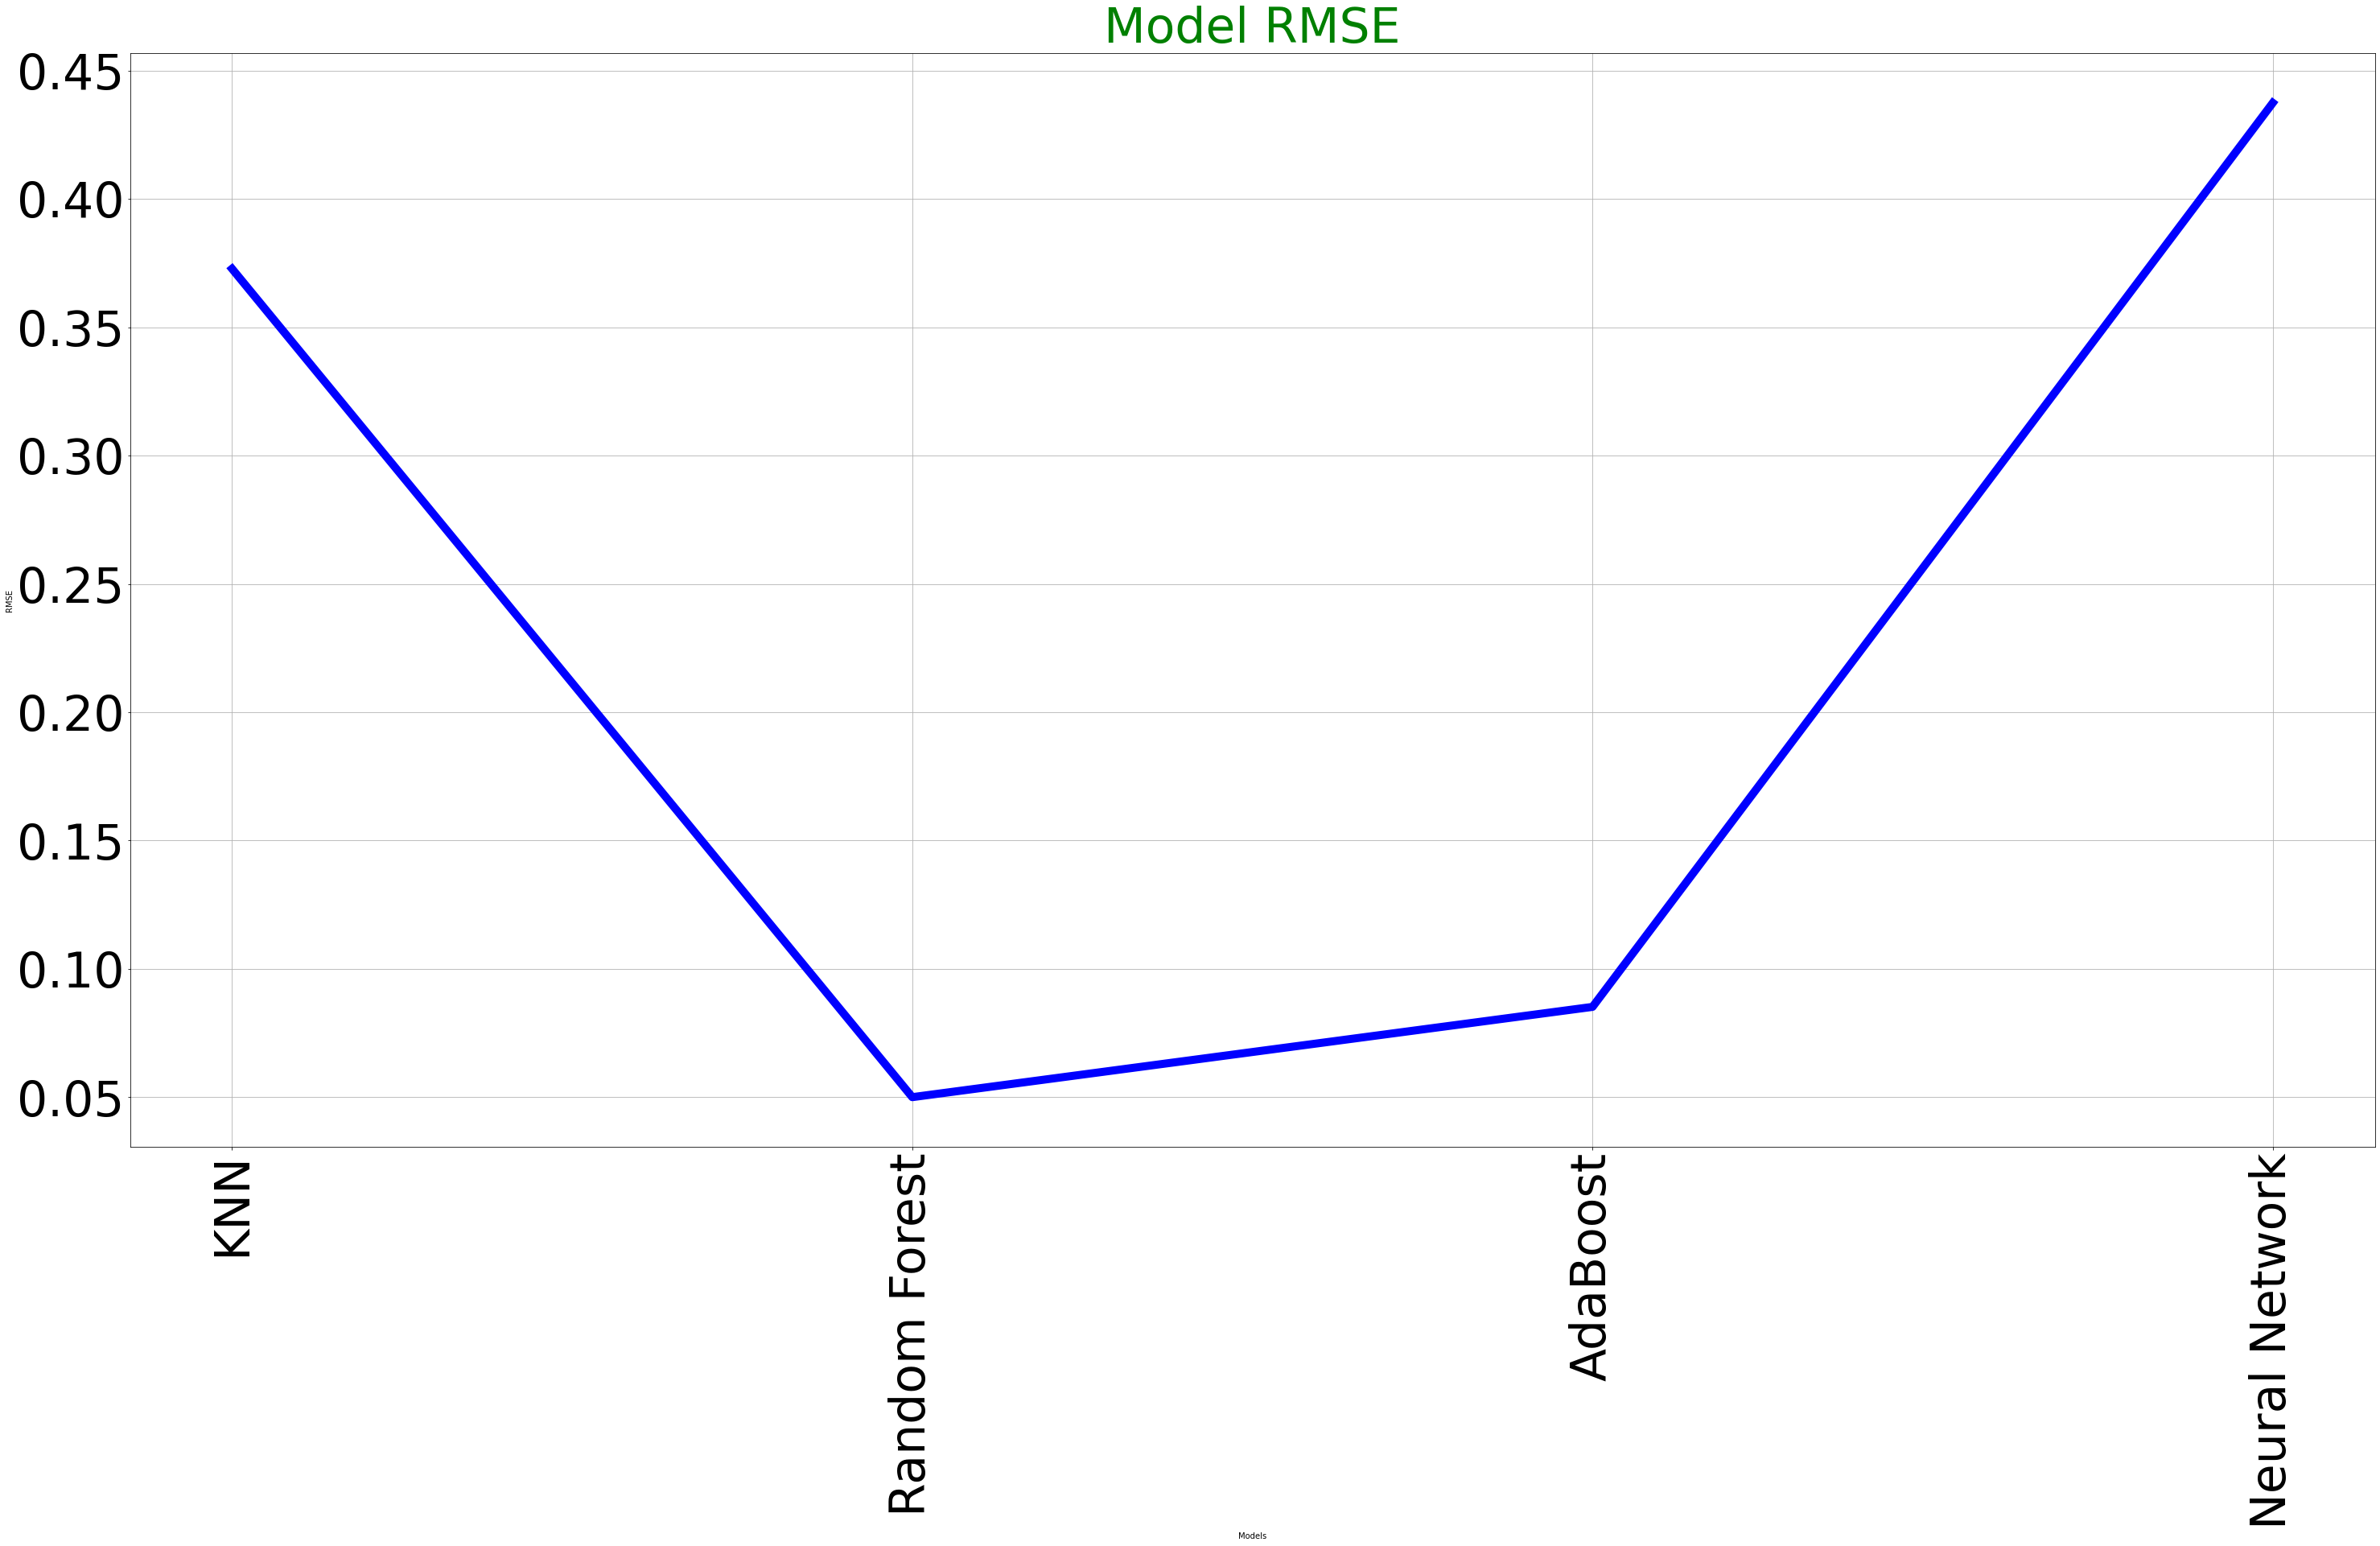

In [55]:
plt.figure(figsize =(50, 25))
plt.plot(Compare['Models'],Compare['RMSE'],c='blue', lw=10)

plt.title('Model RMSE',fontdict={'fontsize': 60,'fontweight' : 60,'color' : 'g'})
plt.xlabel('Models')
plt.ylabel('RMSE')

plt.yticks(fontsize=60)
plt.xticks(rotation=90, fontsize=60)
plt.grid()
plt.savefig("RMSE.jpg",bbox_inches='tight')
plt.show()

# Plotting Model R Squared

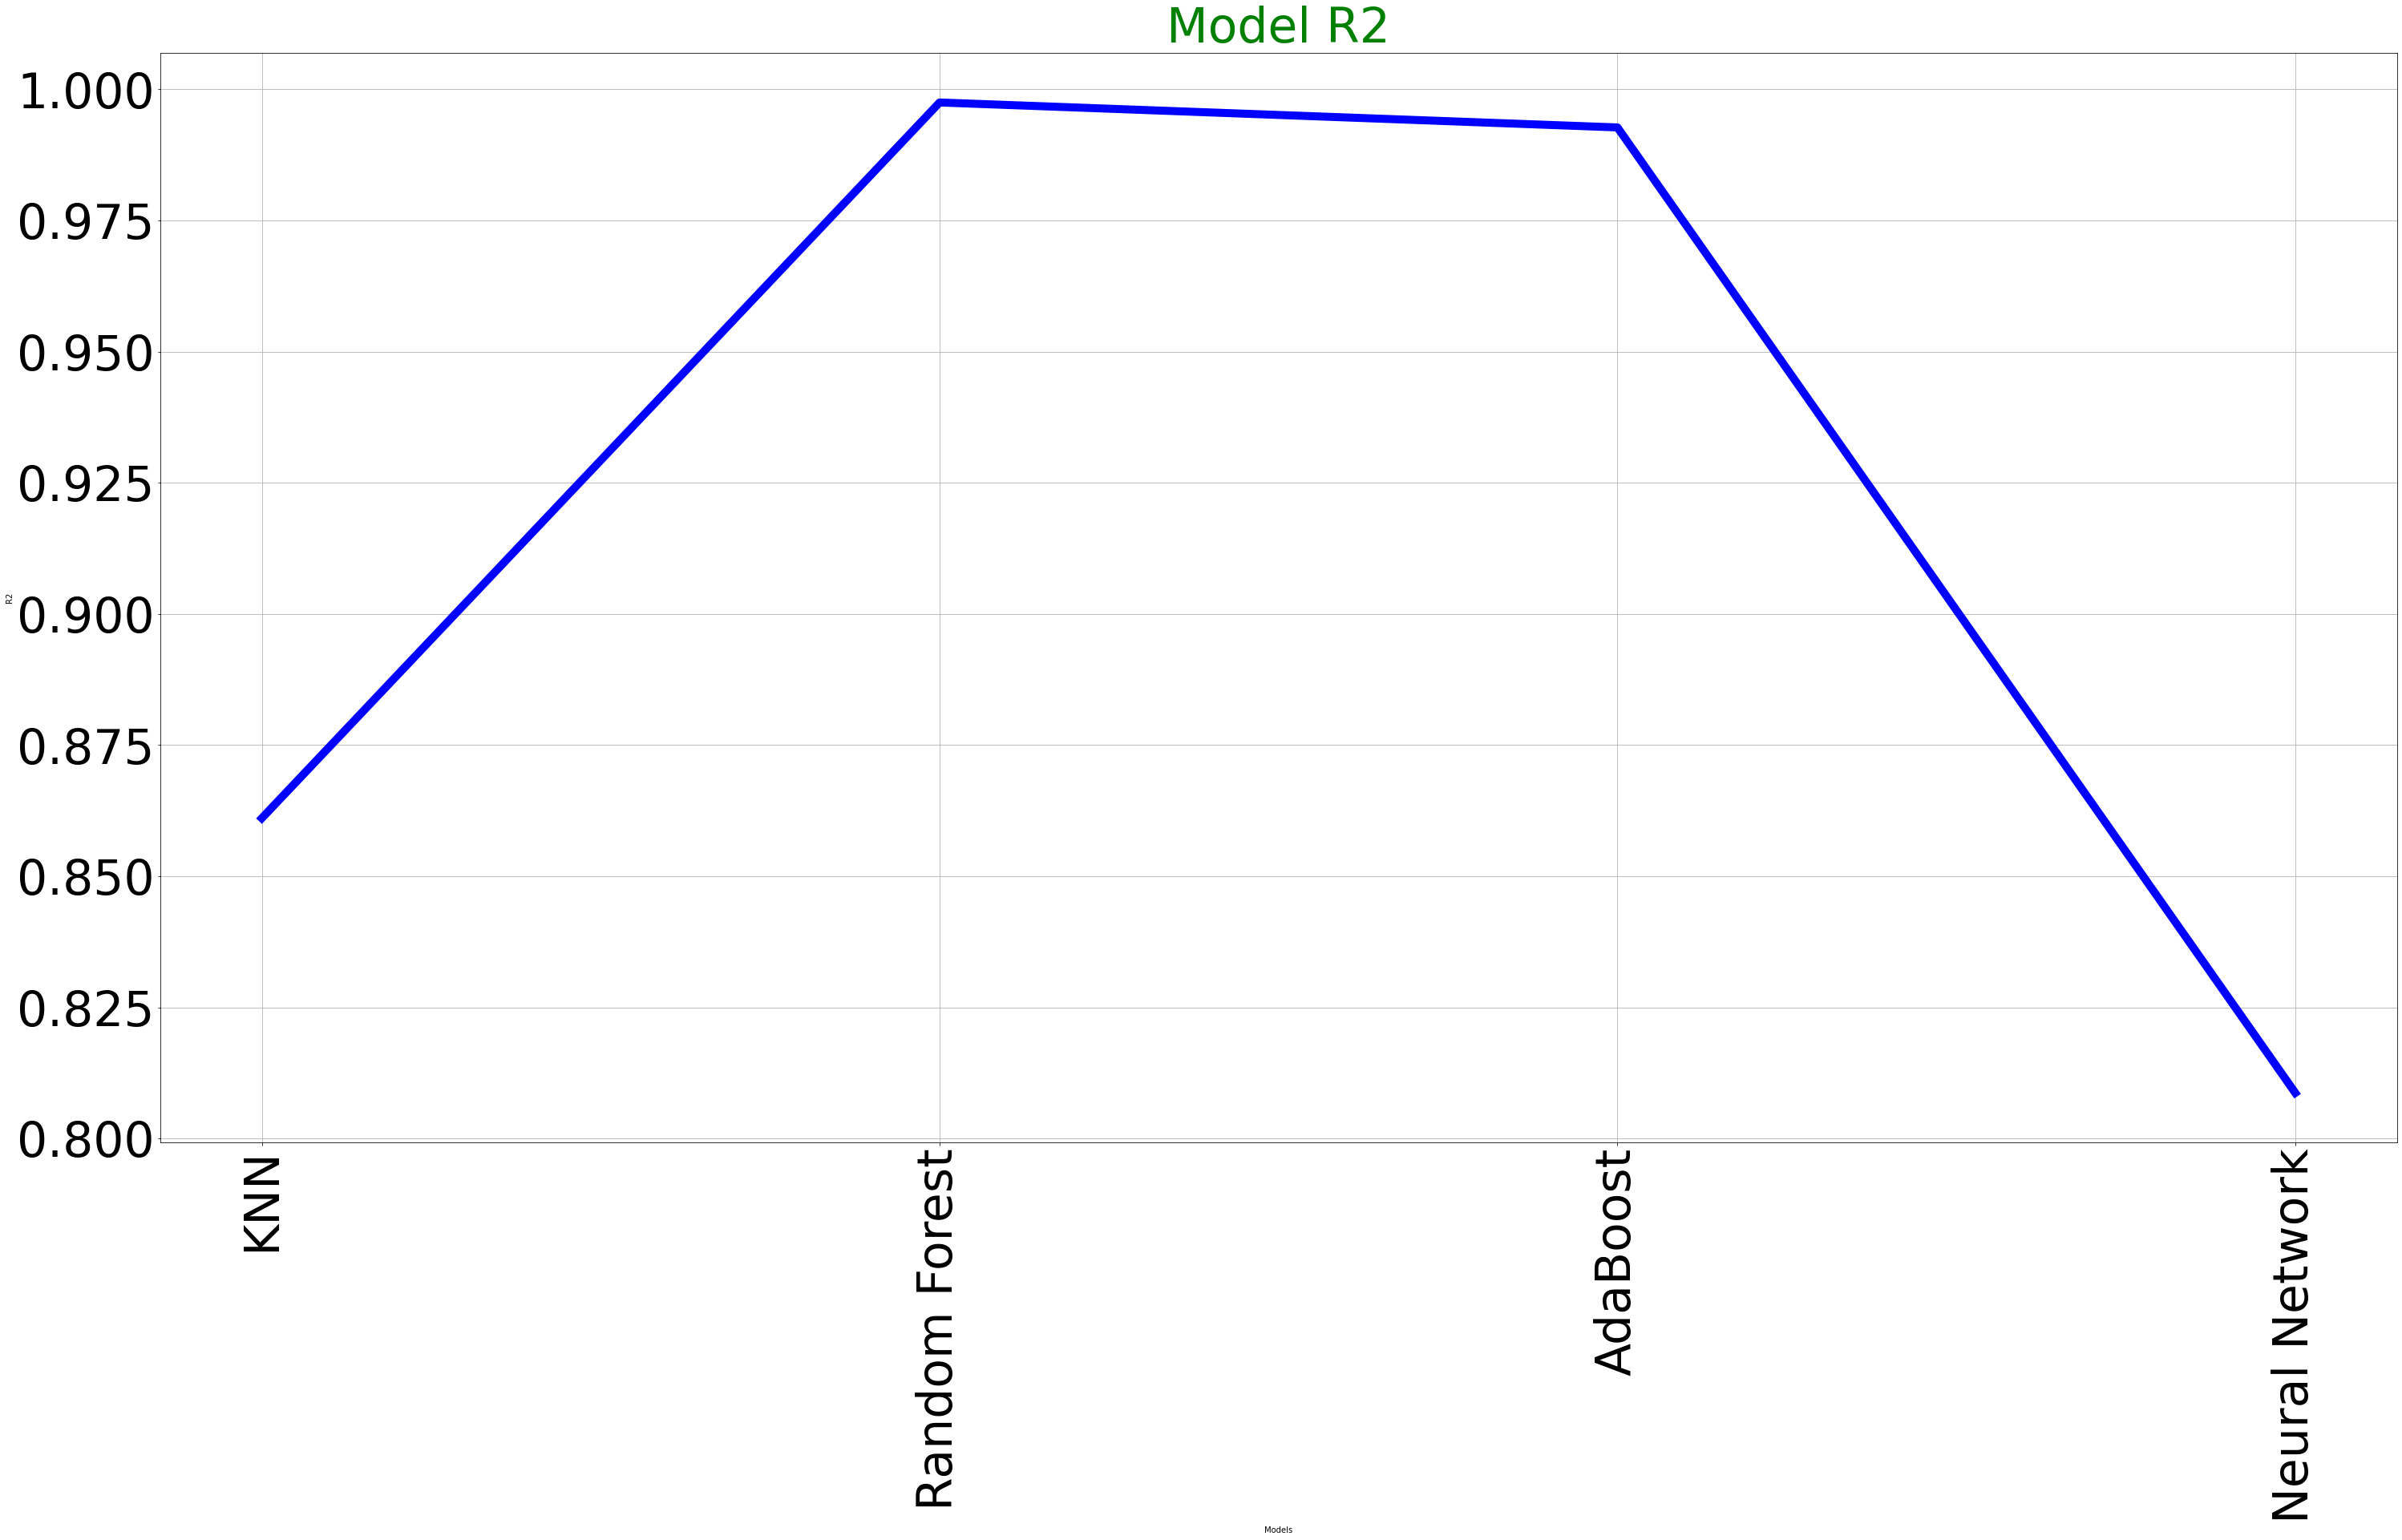

In [56]:
plt.figure(figsize =(50, 25))
plt.plot(Compare['Models'],Compare['R2'],c='blue', lw=10)

plt.title('Model R2',fontdict={'fontsize': 60,'fontweight' : 60,'color' : 'g'})
plt.xlabel('Models')
plt.ylabel('R2')

plt.yticks(fontsize=60)
plt.xticks(rotation=90, fontsize=60)
plt.grid()
plt.savefig("R2.jpg",bbox_inches='tight')
plt.show()

# Plotting Model Adjusted R Squared

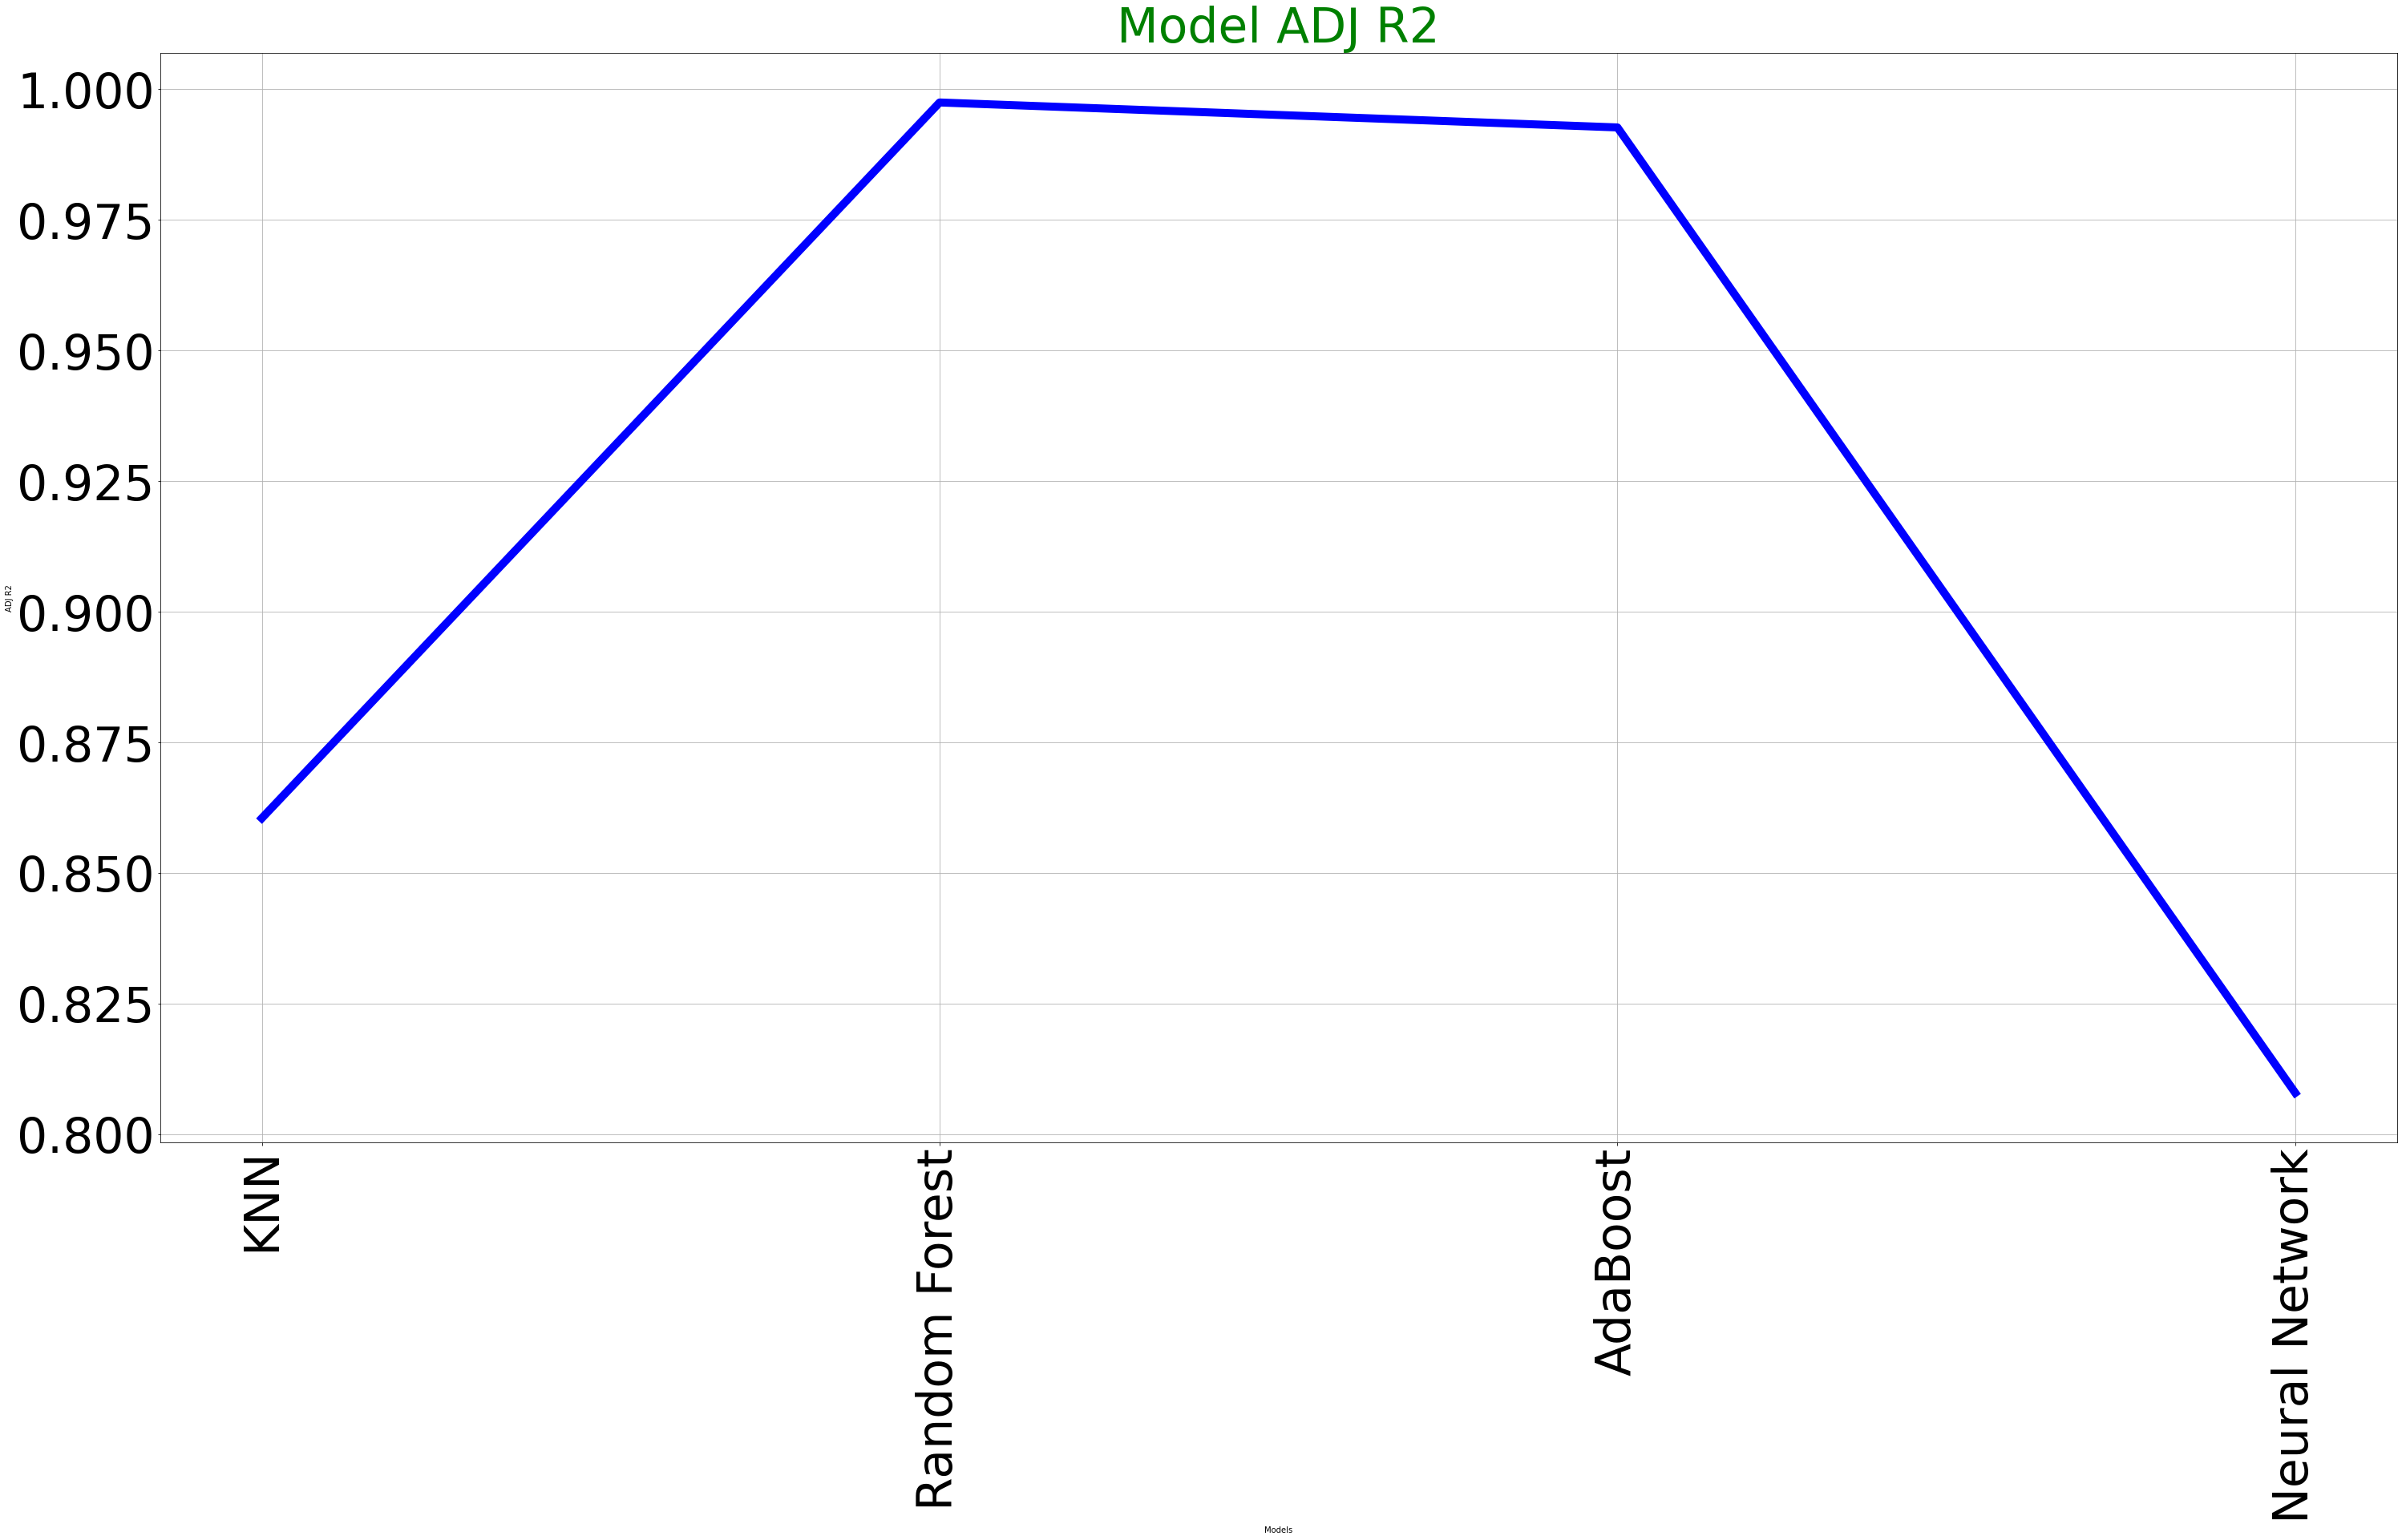

In [57]:
plt.figure(figsize =(50, 25))
plt.plot(Compare['Models'],Compare['ADJ R2'],c='blue', lw=10)

plt.title('Model ADJ R2',fontdict={'fontsize': 60,'fontweight' : 60,'color' : 'g'})
plt.xlabel('Models')
plt.ylabel('ADJ R2')

plt.yticks(fontsize=60)
plt.xticks(rotation=90, fontsize=60)
plt.grid()
plt.savefig("ADJ R2.jpg",bbox_inches='tight')
plt.show()

# Plotting Model MAPE

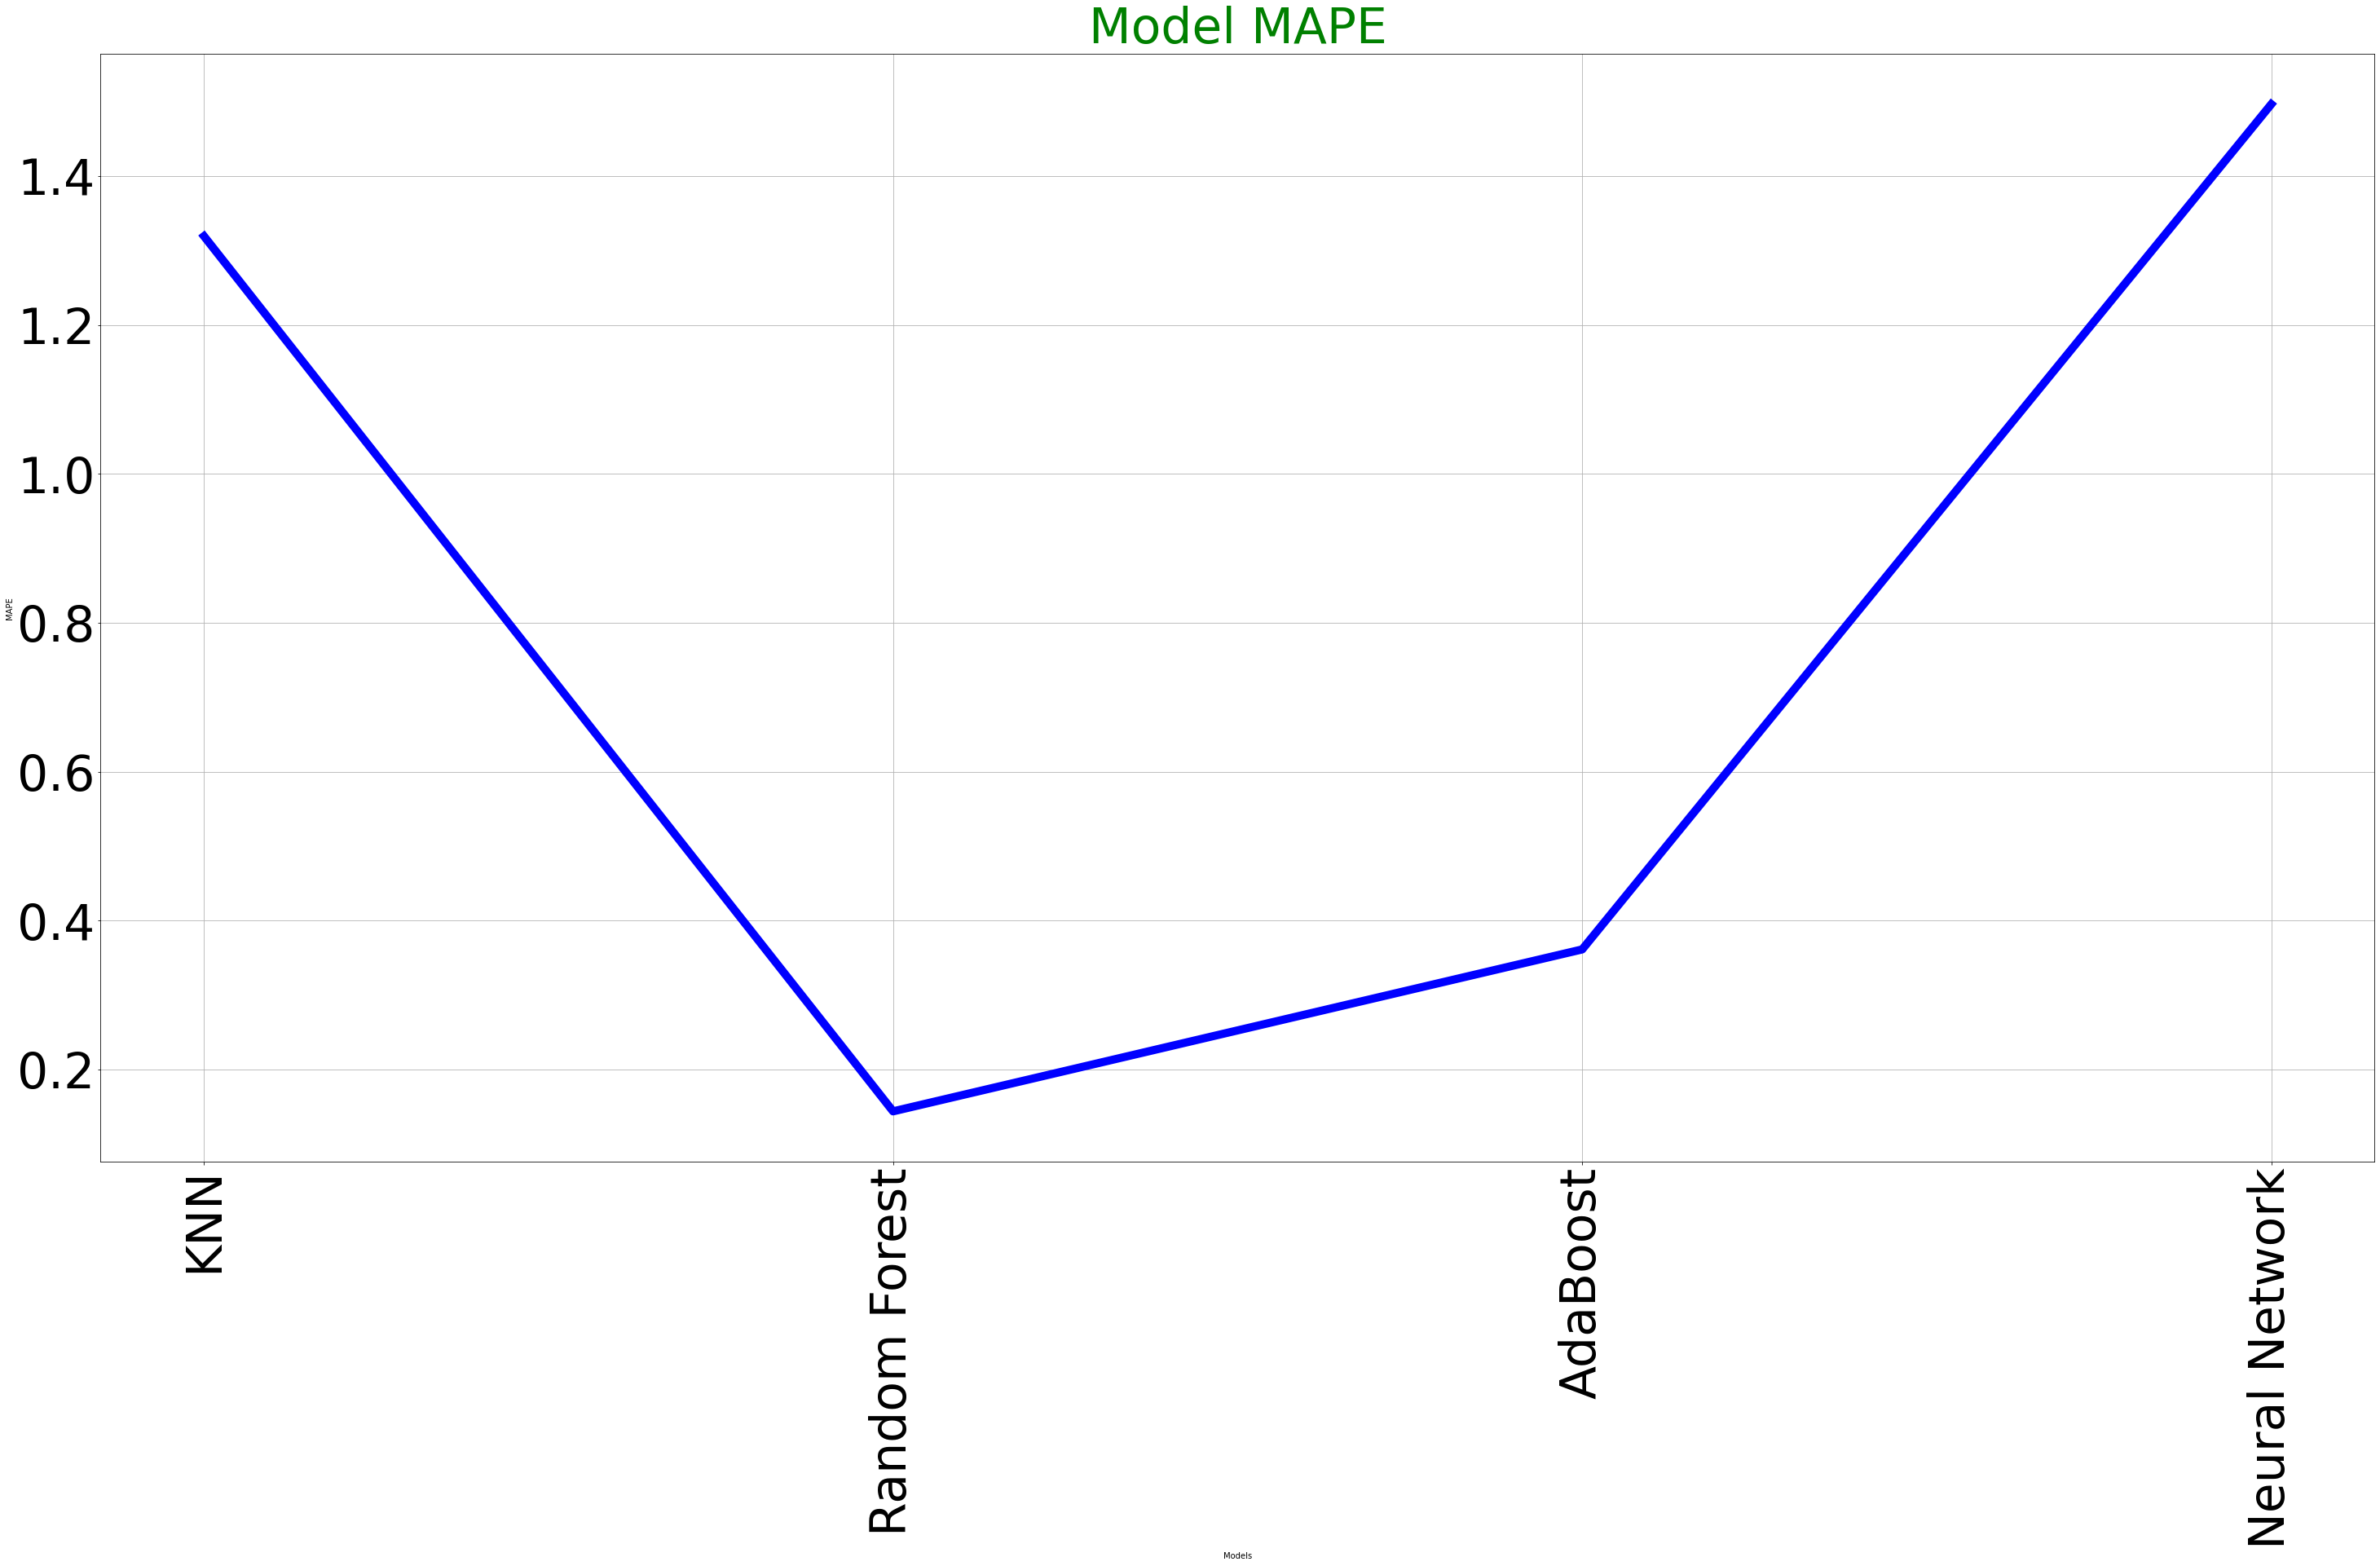

In [58]:
plt.figure(figsize =(50, 25))
plt.plot(Compare['Models'],Compare['MAPE'],c='blue', lw=10)

plt.title('Model MAPE',fontdict={'fontsize': 60,'fontweight' : 60,'color' : 'g'})
plt.xlabel('Models')
plt.ylabel('MAPE')

plt.yticks(fontsize=60)
plt.xticks(rotation=90, fontsize=60)
plt.grid()
plt.savefig("MAPE.jpg",bbox_inches='tight')
plt.show()

<AxesSubplot:>

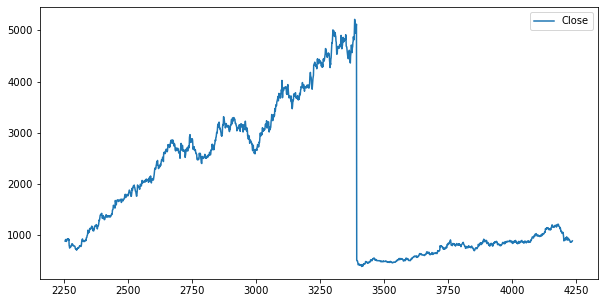

In [61]:
# Visualizing the dataset created for "Close" column
df_2016.plot(y = "Close",figsize=(10,5))


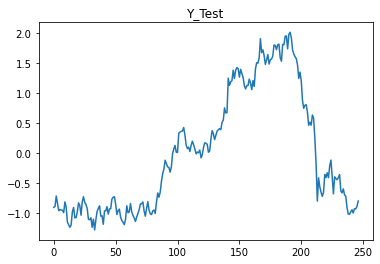

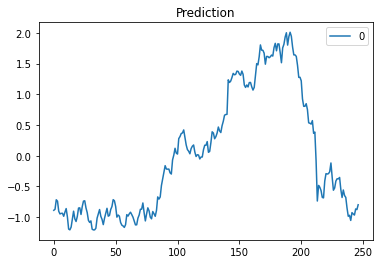

In [64]:
# Visualizing the plot comparing between Y_test and the predicted values for 2016 year
y_pred = model_RF.predict(X_test)
y_pred = pd.DataFrame(y_pred)
Y_test.plot()
plt.title("Y_Test")
plt.savefig("Y_test.jpg",bbox_inches='tight')
y_pred.plot()
plt.title("Prediction")
plt.savefig("Prediction.jpg",bbox_inches='tight')